# Physics 386 HW 2
The method of Maximum Likelihood, demonstrated with a toy Monte Carlo. 
The parts with a * next to them require plots or output numbers.

## a) * Plot a Poisson distribution for mu=3. A Poisson distribution is only valid for integers of N, the number you observe (the variable on the x axis). So, it should look like a bar chart or histogram, or have points for each integer and no line.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Text(0.5, 1.0, 'Poisson probability mass function for $\\mu=3$')

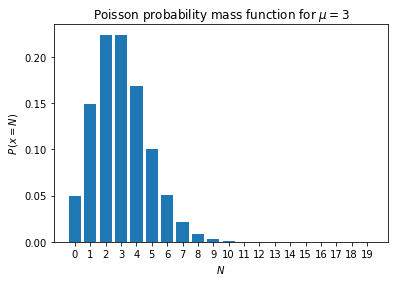

In [2]:
N = np.arange(20, dtype=int) # Natural numbers from 0 to 19
p_N = stats.poisson.pmf(N, mu=3) # Poisson P.M.F. with mu=3

# Plot
fig, ax = plt.subplots()
ax.bar(N, p_N)
ax.set_xticks(N)
plt.xlabel('$N$')
plt.ylabel('$P\,(x=N)$')
plt.title('Poisson probability mass function for $\mu=3$')

## b) Draw 50 random numbers (samples) from the Poisson distribution in a). This is your “data.”

In [3]:
n_sam = 50 # Number of samples
data = stats.poisson.rvs(mu=3, size=n_sam) # Sampling 50 numbers from Poisson distro
np.shape(data)

(50,)

## c) Repeat part b) 100 more times, i.e. generate 100 instances of 50 samples drawn from the same distribution. These are your “simulations” i.e. 100 sets of simulated data that have the same properties as your real data.

In [4]:
n_sim = 100 # Number of simulations
sims = stats.poisson.rvs(mu=3, size=(n_sim, n_sam))
np.shape(sims)

(100, 50)

## d) * For each of your 100 simulations and 1 data set, calculate the mean value of the 50 samples. Plot a histogram of the sample mean value to demonstrate (by eye at least) that this is an unbiased estimator for mu.  Plot a colored vertical line at the location of the data to show its location relative to the simulated distribution.   (This histogram should have 100 entries in it, plus 1 entry for the data.)

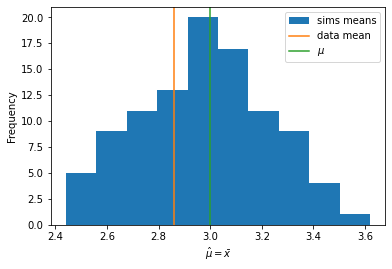

In [5]:
mean_data = np.mean(data) # Mean of data
means_sims = np.mean(sims, axis=1) # Mean for each sim

# Plot
fig, ax = plt.subplots()
ax.hist(means_sims, label='sims means')
ax.axvline(mean_data, color='C1', label='data mean')
ax.axvline(3, color='C2', label='$\mu$')
plt.xlabel('$\hat{\mu} = \\bar{x}$')
plt.ylabel('Frequency')
plt.legend()

## e) * For each simulated set and for the real data (101 total cases), calculate the likelihood function for your “data” and “simulated data.” Plot all of the 101 likelihood functions on one plot (y-axis should be ln(L)). Differentiate the “data” curve with a thicker line and a different color, so we know which is your “data.” Label the x axis with the proper label (note, this isn’t the N from part a) now). Note that now you are not stuck with integer values on the x-axis, and your curves should look smooth.

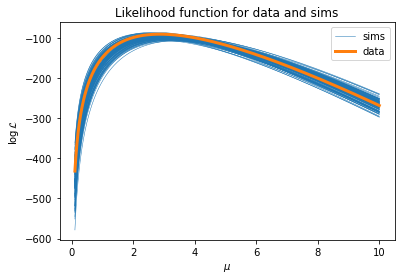

In [6]:
n_mus = 1_000
mu_array = np.linspace(0.1, 10, n_mus)
L_data = np.zeros(n_mus)
L_sims = np.zeros((n_sim, n_mus))

for i, mu in enumerate(mu_array):
    L_data[i] = np.prod(stats.poisson.pmf(data, mu=mu)) # Likelihood function for the data
    L_sims[:,i] = np.prod(stats.poisson.pmf(sims, mu=mu), axis=1) # Likelihood functions for each sims

log_L_data = np.log(L_data)
log_L_sims = np.log(L_sims)

# Plot
fig, ax = plt.subplots()
ax.plot(mu_array, log_L_sims[0], color='C0', linewidth=0.5, label='sims')
for i in range(1, n_sim):
    ax.plot(mu_array, log_L_sims[i], color='C0', linewidth=0.5)
ax.plot(mu_array, log_L_data, color='C1', linewidth=3, label='data')
plt.xlabel('$\mu$')
plt.ylabel('$\log{\mathcal{L}}$')
plt.title('Likelihood function for data and sims')
plt.legend()

## f) * Use the method of maximum likelihood to estimate the true value of mu from each simulation and your real data.

In [7]:
mu_data = mu_array[np.argmax(log_L_data)] # mu M.L.E. from data
mus_sims = mu_array[np.argmax(log_L_sims, axis=1)] # mu M.L.E. for each sim

print(f'mu M.L.E. from data: {mu_data}')
print(f'mu M.L.E.s from sims: {mus_sims}')

mu M.L.E. from data: 2.8648648648648654
mu M.L.E.s from sims: [2.5972973  2.9045045  2.92432432 3.04324324 3.4        3.0036036
 3.18198198 3.61801802 3.34054054 2.7954955  2.75585586 2.88468468
 2.65675676 2.83513514 3.47927928 3.08288288 2.81531532 2.6963964
 3.06306306 2.71621622 2.86486486 2.94414414 3.08288288 2.94414414
 3.18198198 2.81531532 2.86486486 3.22162162 3.06306306 3.02342342
 3.02342342 3.06306306 3.06306306 2.43873874 2.65675676 3.26126126
 3.3009009  3.06306306 2.67657658 2.81531532 3.0036036  2.71621622
 2.98378378 3.3009009  3.04324324 2.86486486 2.51801802 3.08288288
 3.28108108 3.28108108 3.4        2.47837838 3.2018018  2.67657658
 3.2018018  3.28108108 3.02342342 3.22162162 3.3009009  2.96396396
 2.86486486 2.65675676 2.7954955  3.0036036  2.98378378 3.12252252
 3.12252252 3.1027027  3.06306306 2.94414414 2.63693694 2.96396396
 2.9045045  2.71621622 2.94414414 3.2018018  3.36036036 2.94414414
 3.34054054 2.75585586 2.73603604 3.16216216 3.18198198 2.61711712
 3

## g) * Use the rule of thumb that the log likelihood decreases by -½ from its peak value at the +/-1 sigma errors to estimate the error on this reconstruction. (see note	 N1 below) 

In [8]:
max_log_l_data = np.amax(log_L_data)
sigma_data = np.abs(mu_data - mu_array[np.argmin((log_L_data - max_log_l_data + 1/2)**2)])
print(f'approx +- 1 sigma using the rule of thumb is: {sigma_data}')

approx +- 1 sigma using the rule of thumb is: 0.23783783783783807


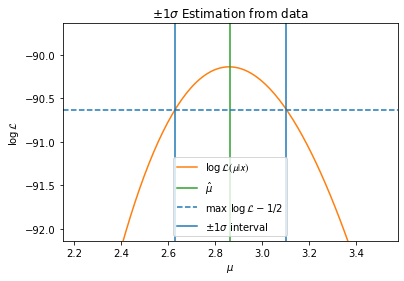

In [9]:
# Plot for verification:
fig, ax = plt.subplots()
ax.plot(mu_array, log_L_data, color='C1', label='$\log{\mathcal{L(\mu | x)}}$')
ax.axvline(mu_data, color='C2', label='$\hat{\mu}$')
ax.axhline(max_log_l_data-1/2, linestyle='--', label='$\max{\ \log{\mathcal{L}}}-1/2$')
ax.axvline(mu_data + sigma_data, label='$\pm 1 \sigma$ interval')
ax.axvline(mu_data - sigma_data)
plt.xlabel('$\mu$')
plt.ylabel('$\log{\mathcal{L}}$')
plt.xlim(mu_data-3*sigma_data, mu_data+3*sigma_data)
plt.ylim(max_log_l_data-2, max_log_l_data+1/2)
plt.title('$\pm 1 \sigma$ Estimation from data')
plt.legend()

Seems alright, so our estimate of $\hat{\mu}$ taken from the data is given by:
$$\hat{\mu} = 2.86 \pm 0.24$$

We can also calculate the $\pm 1\ \sigma$ error bars for each of the sims:

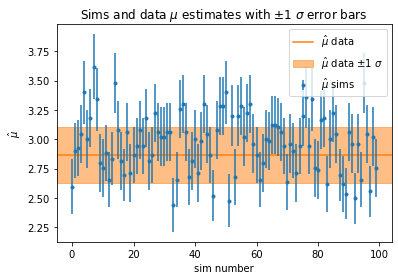

In [10]:
max_log_l_sims = np.amax(log_L_sims, axis=1)
max_log_l_sims = np.tile(max_log_l_sims, (len(mu_array),1)).T
sigmas_sims = np.abs(mus_sims - mu_array[np.argmin((log_L_sims - max_log_l_sims + 1/2)**2, axis=1)]) # +-1 sigma for each sim 

# Plot
fig, ax = plt.subplots()
sim_n = np.arange(n_sim)
ax.axhline(mu_data, color='C1', label='$\hat{\mu}$ data')
ax.axhspan(mu_data-sigma_data, mu_data+sigma_data, color='C1', alpha=0.5, label='$\hat{\mu}$ data $\pm 1\ \sigma$')
ax.errorbar(sim_n, mus_sims, yerr=sigmas_sims, color='C0', fmt='.', label='$\hat{\mu}$ sims')
plt.title('Sims and data $\mu$ estimates with $\pm 1\ \sigma$ error bars')
plt.xlabel('sim number')
plt.ylabel('$\hat{\mu}$')
plt.legend()

## h) * For the estimate of mu and the “one sigma error bars” quoted from your data, what fraction of the estimates of the 100 simulations fall in this range?

In [11]:
in_range = np.count_nonzero(np.where(np.abs(mus_sims-mu_data)<=sigma_data, True, False))
print(f'The percentage of the estimates of simulations in the range without considering sims errorbars is: {int(in_range/n_sim*100)} %')
# Note: I could consider the sims errorbars and perform a chi2 test to better see the proportion of agreement, but the problem is not asking for that

The percentage of the estimates of simulations in the range without considering sims errorbars is: 64 %
